In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime
import matplotlib.pyplot as plt

In [86]:
data = pd.read_csv("marketing_campaign.xls",sep='\t')
data.Dt_Customer = pd.to_datetime(data.Dt_Customer,format="%d-%m-%Y")
data.insert(2,"Age",2024-data.Year_Birth)
data["Marital_Status"] = data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
data = data.dropna()
data.insert(6,"Spent",data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,2012-09-04,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2014-03-08,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,2013-08-21,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,2014-02-10,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,2014-01-19,...,5,0,0,0,0,0,0,3,11,0


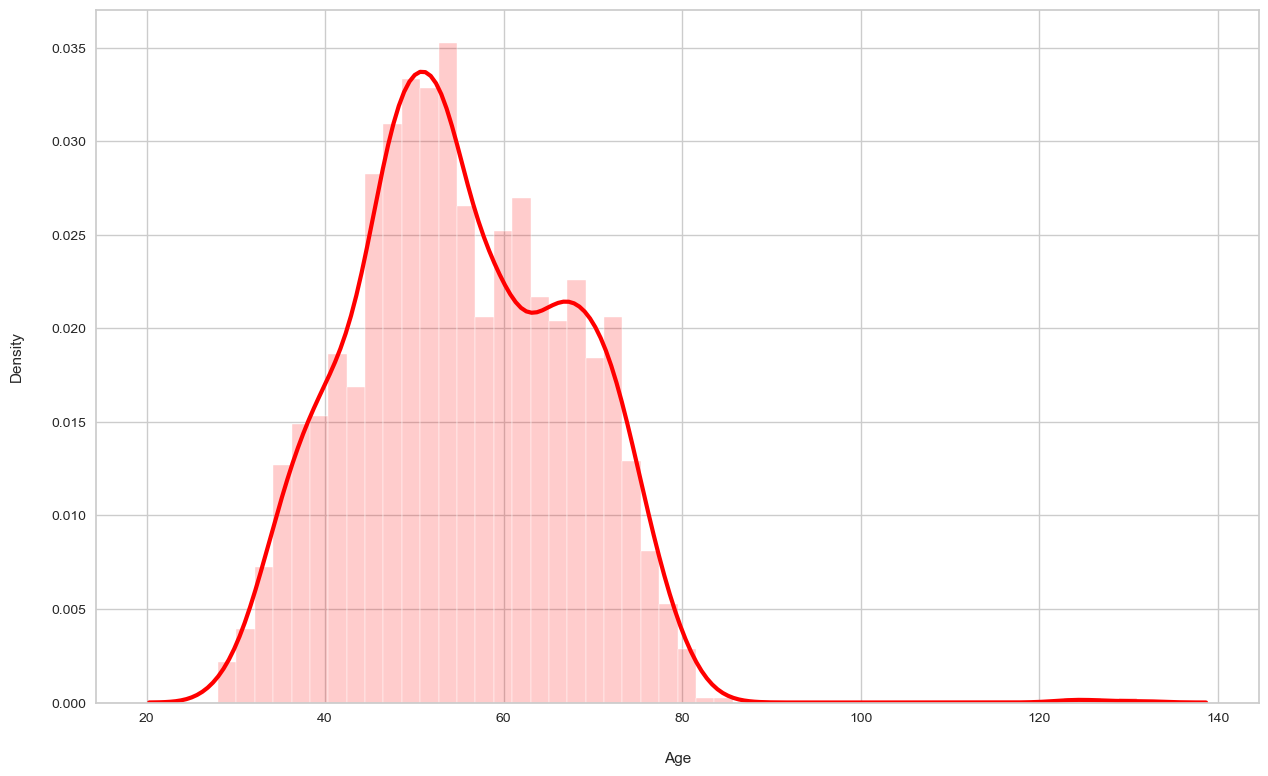

In [87]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Age, 
    bins=50, 
    stat='density',
    alpha=0.2,
    color = "red"
)

density_curve = sns.kdeplot(data.Age, linewidth=3, color="red")

plt.xlabel("Age", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [88]:
data = data[data.Age < 100]

In [89]:
mean_age = data.Age.mean()
median_age = data.Age.median()
std_age = data.Age.std()
print("Media: " + str(mean_age))
print("Mediana: " + str(median_age))
print("Standard deviation: " + str(std_age))

Media: 55.082693176683236
Mediana: 54.0
Standard deviation: 11.700216129683866


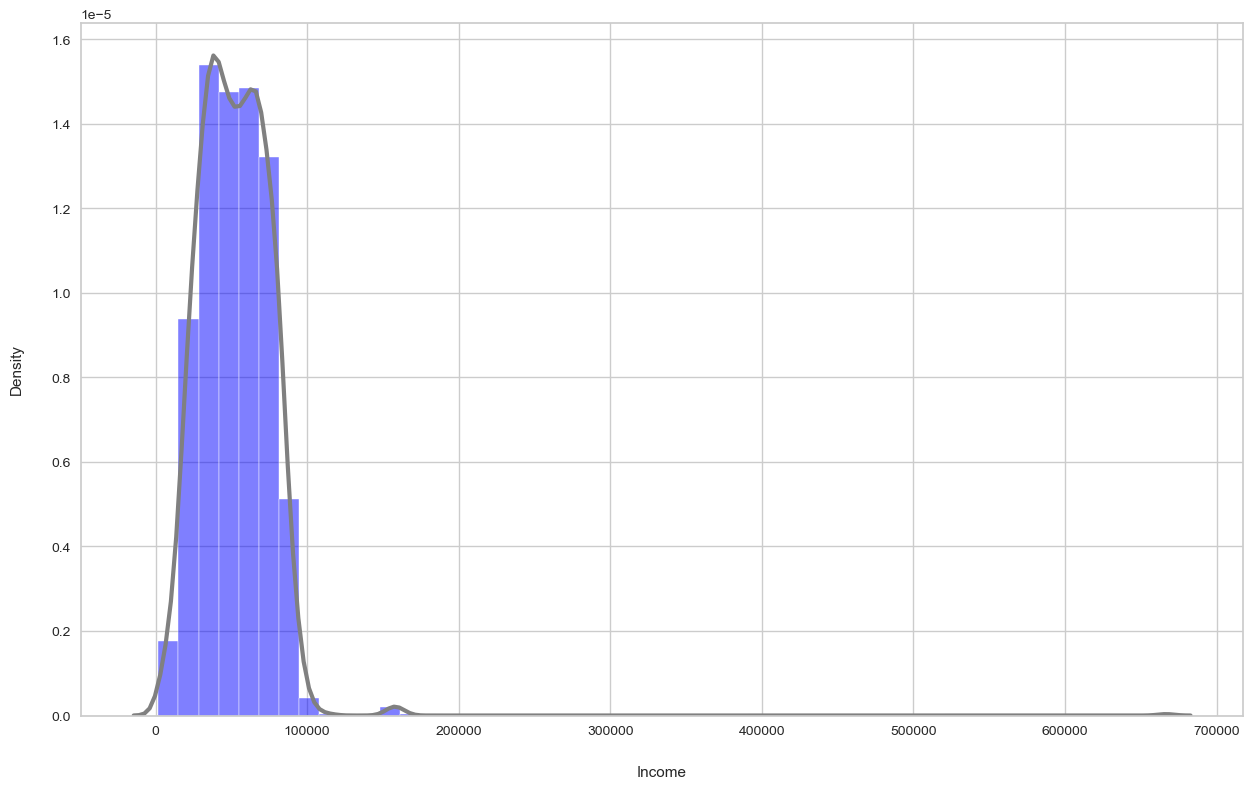

In [90]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    data.Income, 
    bins=50, 
    stat='density',
    alpha=0.5,
    color = "blue"
)

density_curve = sns.kdeplot(data.Income, linewidth=3, color="grey")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [91]:
data = data[data.Income < 600000]

In [92]:
mean_income = data.Income.mean()
median_income = data.Income.median()
std_income = data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 51958.81057866185
Mediana: 51371.0
Standard deviation: 21527.278844050503


In [93]:
counts_edu = data.Education.value_counts()
print(counts_edu)

Education
Graduation    1115
PhD            480
Master         365
2n Cycle       198
Basic           54
Name: count, dtype: int64


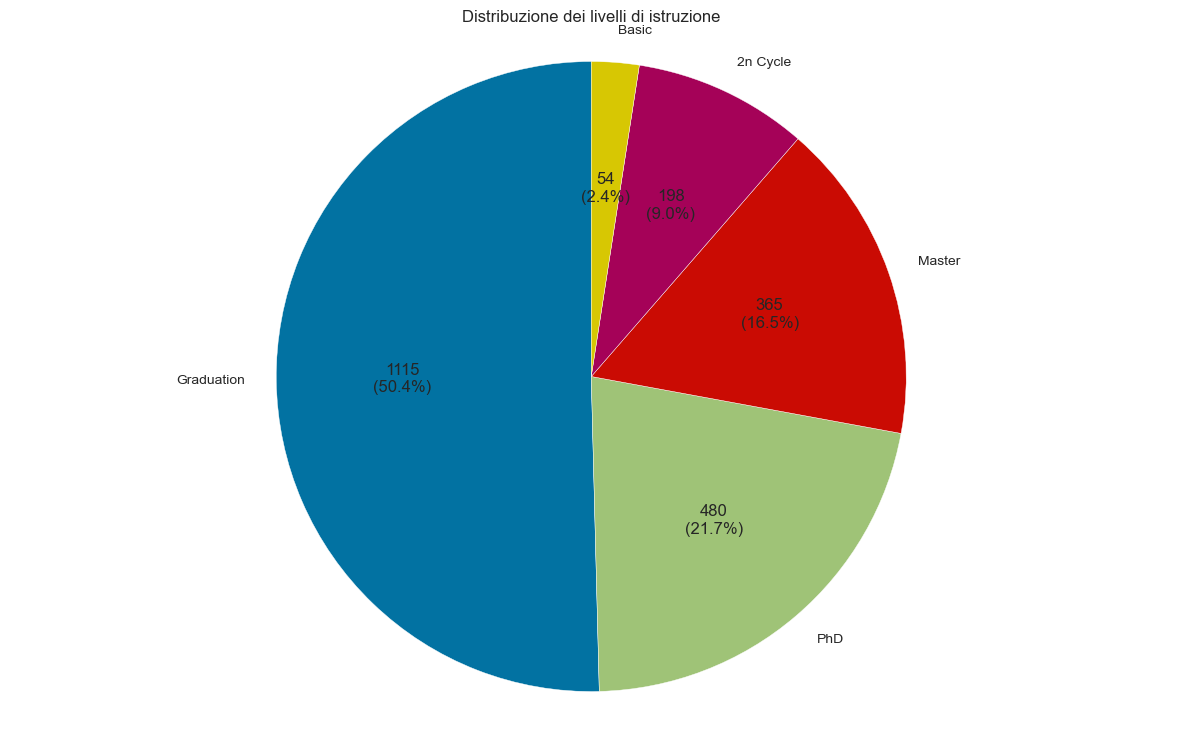

In [94]:
total = counts_edu.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_edu, labels=counts_edu.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione dei livelli di istruzione')
plt.show()

In [95]:
counts_status = data.Marital_Status.value_counts()
print(counts_status)

Marital_Status
Partner    1428
Alone       784
Name: count, dtype: int64


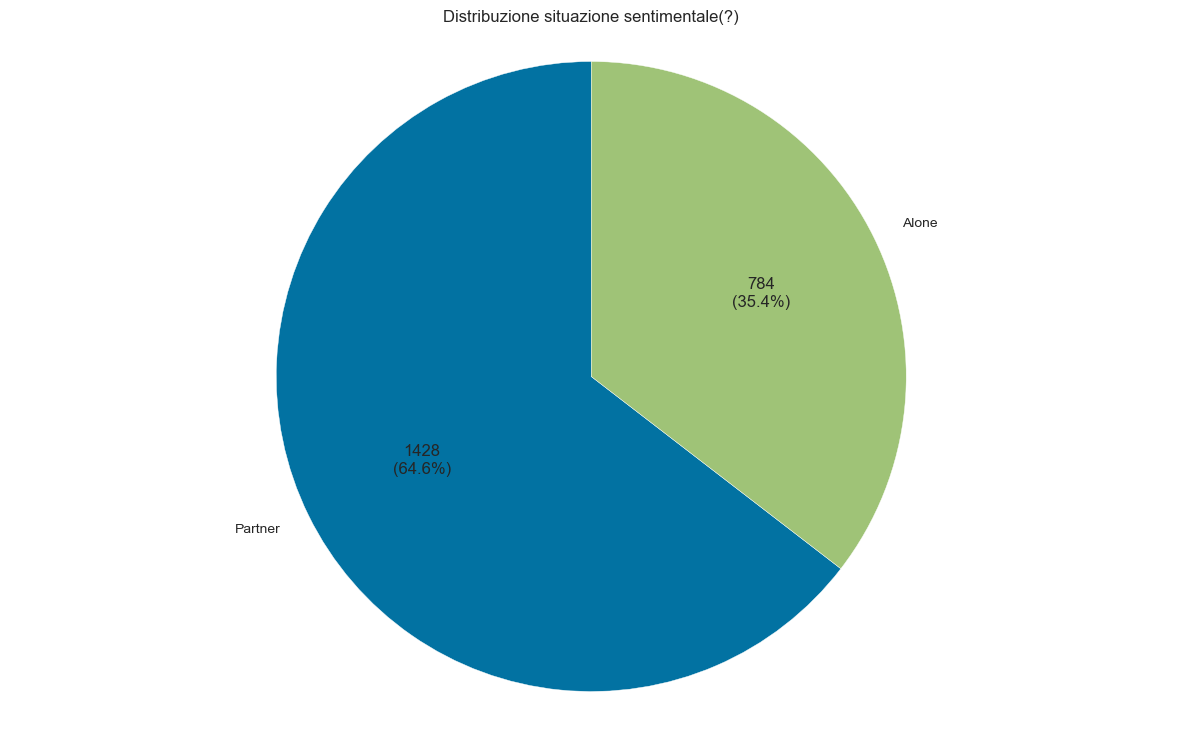

In [96]:
total = counts_status.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_status, labels=counts_status.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Distribuzione situazione sentimentale(?)')
plt.show()

In [97]:
counts_children = data.Kidhome.value_counts()
print(counts_children)

Kidhome
0    1281
1     885
2      46
Name: count, dtype: int64


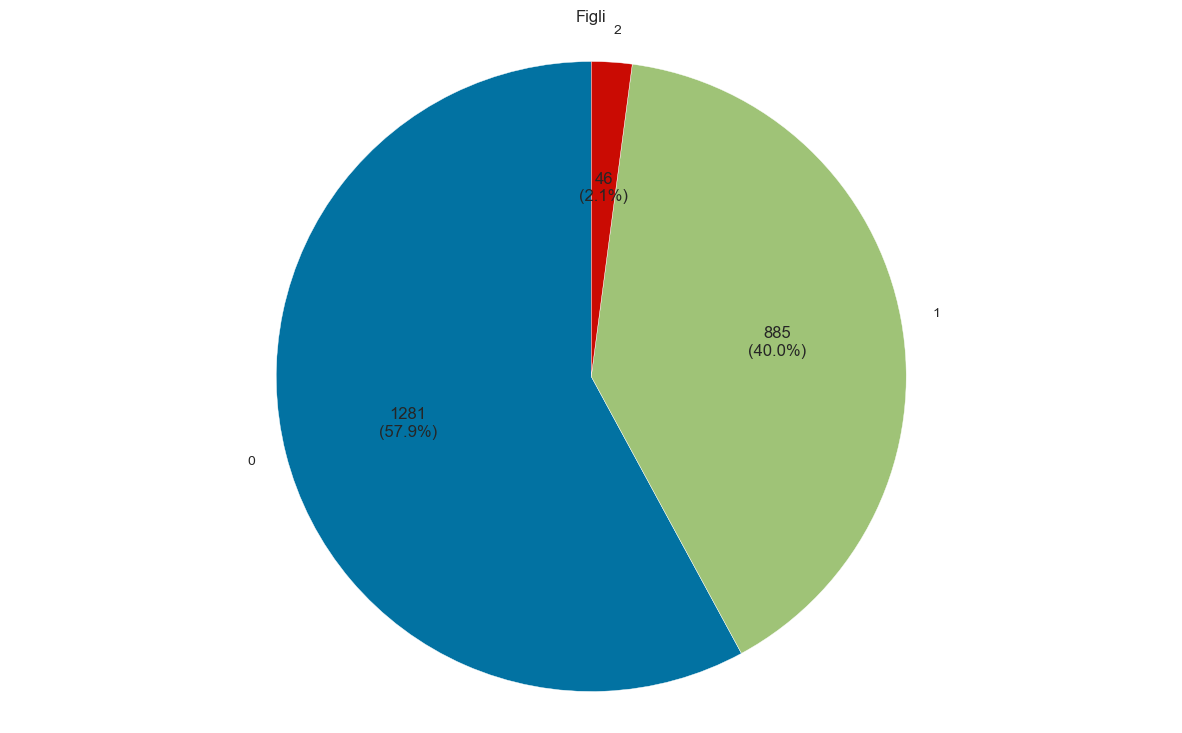

In [98]:
total = counts_children.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_children, labels=counts_children.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Figli')
plt.show()

In [99]:
counts_teen = data.Teenhome.value_counts()
print(counts_teen)

Teenhome
0    1144
1    1017
2      51
Name: count, dtype: int64


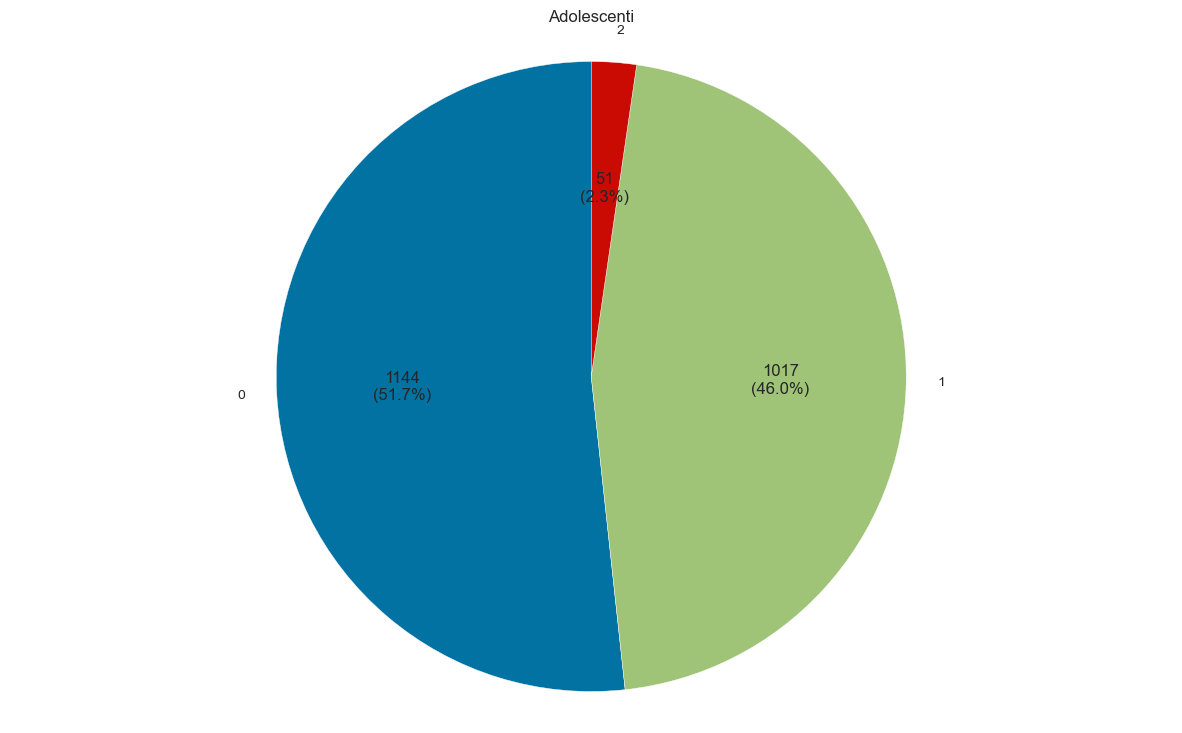

In [100]:
total = counts_teen.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_teen, labels=counts_teen.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [101]:
data.insert(9,"Children",data["Kidhome"]+ data["Teenhome"])
data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0


In [102]:
counts_figli = data.Children.value_counts()
print(counts_figli)

Children
1    1114
0     632
2     416
3      50
Name: count, dtype: int64


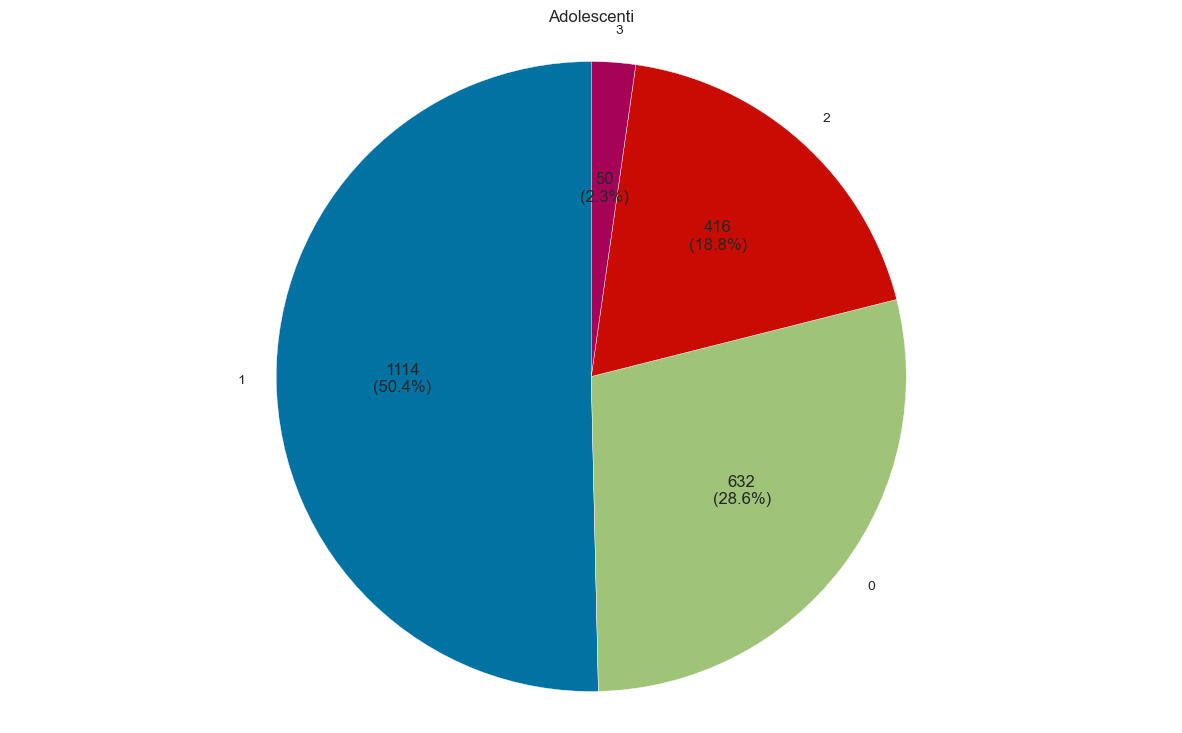

In [103]:
total = counts_figli.sum()

# Funzione per mostrare sia i conteggi che le percentuali
def autopct(pct):
    count = int(round(pct * total / 100))
    return f'{count}\n({pct:.1f}%)'
plt.figure(figsize=(15,9))
plt.pie(counts_figli, labels=counts_figli.index, autopct=autopct, startangle=90)
plt.axis('equal')
plt.title('Adolescenti')
plt.show()

In [104]:
phd_data = data.loc[data.Education== 'PhD']
phd_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
4,5324,1981,43,PhD,Partner,58293.0,422,1,0,1,...,5,0,0,0,0,0,0,3,11,0
7,6177,1985,39,PhD,Partner,33454.0,169,1,0,1,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,50,PhD,Partner,30351.0,46,1,0,1,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,74,PhD,Partner,5648.0,49,1,1,2,...,20,1,0,0,0,0,0,3,11,0
15,2114,1946,78,PhD,Alone,82800.0,1315,0,0,0,...,3,0,0,1,1,0,0,3,11,1


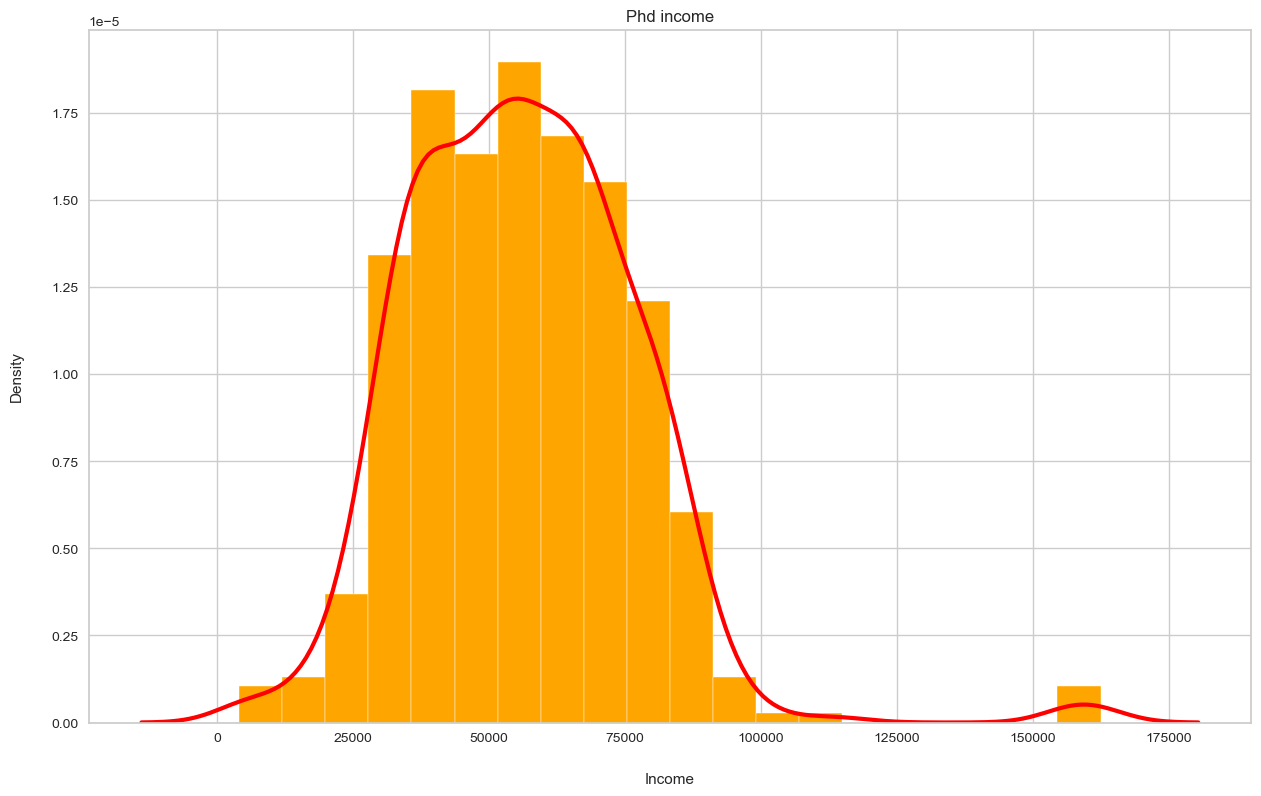

In [105]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    phd_data.Income, 
    bins=20, 
    stat='density',
    alpha=1,
    color = "orange"
)

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="red")

plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.title("Phd income")
plt.show()

In [106]:
mean_income = phd_data.Income.mean()
median_income = phd_data.Income.median()
std_income = phd_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 56088.25833333333
Mediana: 55185.0
Standard deviation: 20596.42935560307


In [107]:
basic_data = data.loc[data.Education== 'Basic']
basic_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
11,387,1976,48,Basic,Partner,7500.0,61,0,0,0,...,8,0,0,0,0,0,0,3,11,0
105,8373,1979,45,Basic,Partner,24594.0,29,1,0,1,...,5,0,0,0,0,0,0,3,11,0
136,5342,1976,48,Basic,Alone,9548.0,29,1,0,1,...,8,0,0,0,0,0,0,3,11,0
184,2563,1961,63,Basic,Partner,28249.0,43,0,0,0,...,6,0,0,0,0,0,0,3,11,0
190,9733,1978,46,Basic,Partner,24882.0,80,1,0,1,...,6,1,0,0,0,0,0,3,11,0


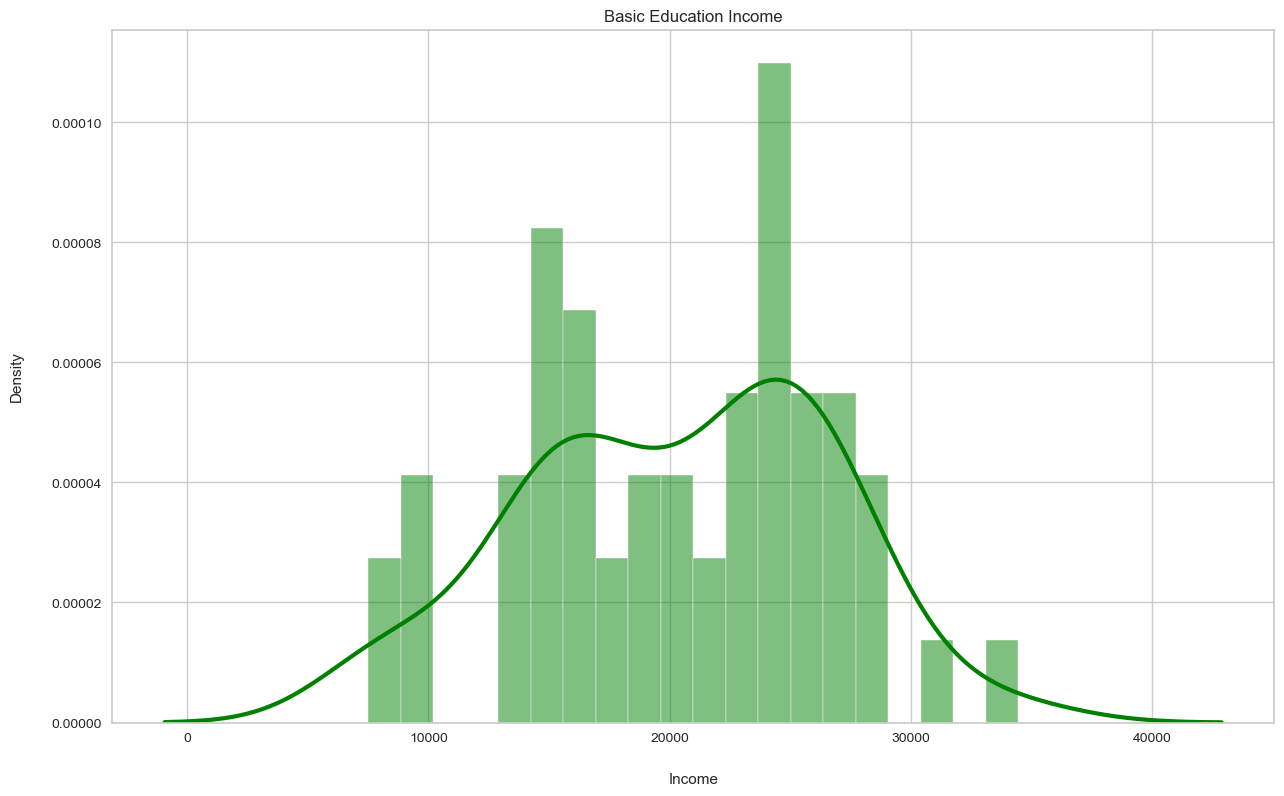

In [108]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    basic_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="green")

plt.title("Basic Education Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [109]:
mean_income = basic_data.Income.mean()
median_income = basic_data.Income.median()
std_income = basic_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 20306.25925925926
Mediana: 20744.0
Standard deviation: 6235.066773288436


In [110]:
graduation_data = data.loc[data.Education== 'Graduation']
graduation_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,67,Graduation,Alone,58138.0,1617,0,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,70,Graduation,Alone,46344.0,27,1,1,2,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,59,Graduation,Partner,71613.0,776,0,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,40,Graduation,Partner,26646.0,53,1,0,1,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,53,Graduation,Alone,55635.0,590,0,1,1,...,6,0,0,0,0,0,0,3,11,0


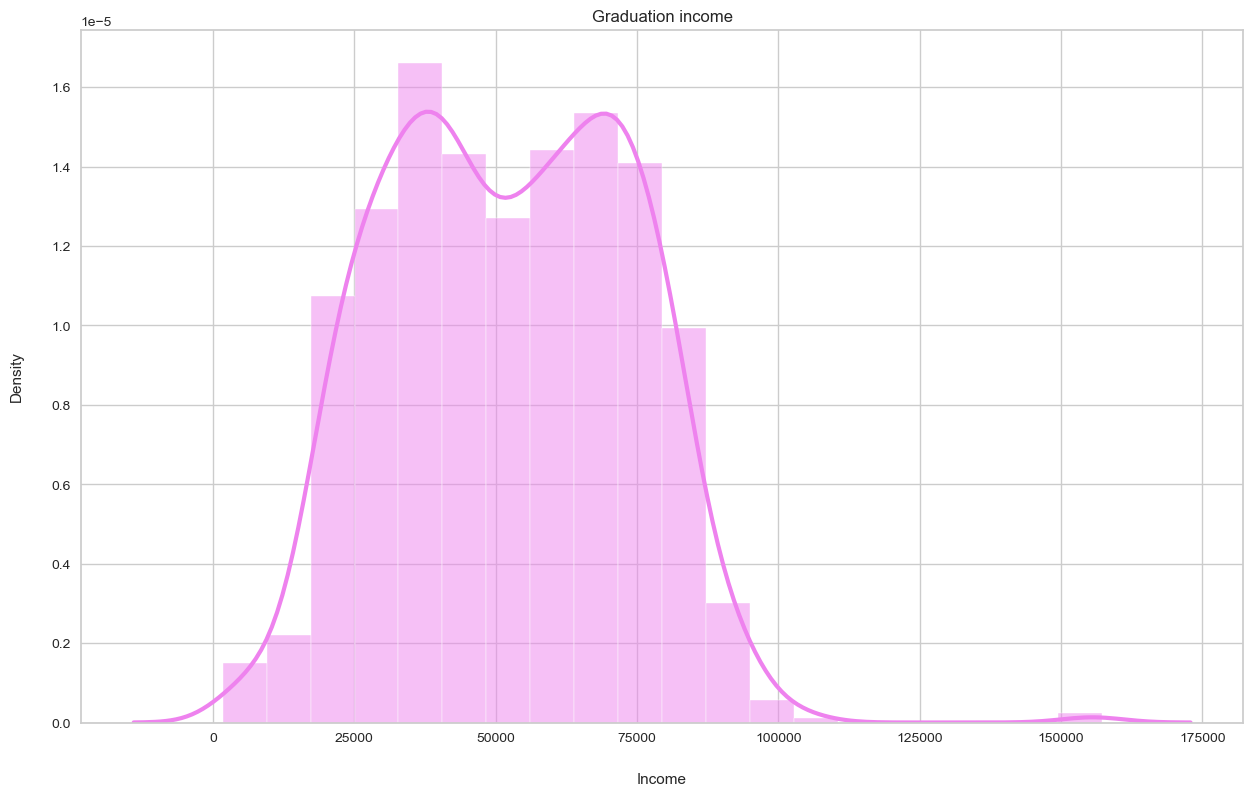

In [111]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    graduation_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "violet"
)

density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="violet")

plt.title("Graduation income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [112]:
graduation_data = graduation_data[graduation_data.Income < 600000]

In [113]:
mean_income = graduation_data.Income.mean()
median_income = graduation_data.Income.median()
std_income = graduation_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52169.74977578475
Mediana: 51983.0
Standard deviation: 21354.316952362664


In [114]:
cycle_data = data.loc[data.Education== '2n Cycle']
cycle_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
19,2278,1985,39,2n Cycle,Alone,33812.0,133,1,0,1,...,6,0,0,0,0,0,0,3,11,0
37,10755,1976,48,2n Cycle,Partner,23718.0,81,1,0,1,...,7,0,0,0,0,0,0,3,11,0
46,9909,1996,28,2n Cycle,Partner,7500.0,122,0,0,0,...,9,0,0,0,0,0,0,3,11,1
67,9369,1979,45,2n Cycle,Alone,88194.0,1274,0,1,1,...,5,1,0,0,1,0,0,3,11,1
78,10401,1976,48,2n Cycle,Partner,26326.0,18,0,0,0,...,3,0,0,0,0,0,1,3,11,0


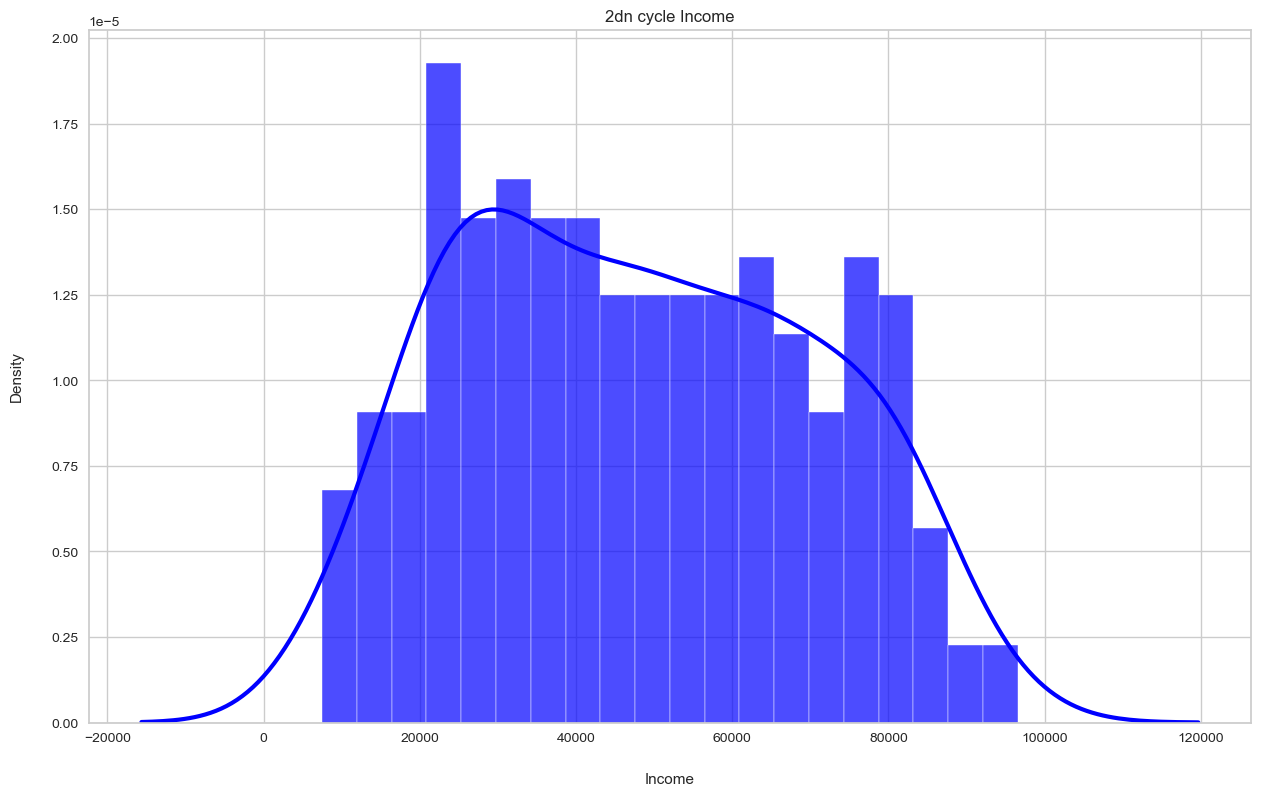

In [115]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    cycle_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.7,
    color = "blue"
)

density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="blue")

plt.title("2dn cycle Income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [116]:
mean_income = cycle_data.Income.mean()
median_income = cycle_data.Income.median()
std_income = cycle_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 47625.333333333336
Mediana: 46805.0
Standard deviation: 22199.27828524584


In [117]:
master_data = data.loc[data.Education== 'Master']
master_data.head()

,ID,Year_Birth,Age,Education,Marital_Status,Income,Spent,Kidhome,Teenhome,Children,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
5,7446,1967,57,Master,Partner,62513.0,716,0,1,1,...,6,0,0,0,0,0,0,3,11,0
13,8180,1952,72,Master,Alone,59354.0,310,1,1,2,...,6,0,0,0,0,0,0,3,11,0
18,6565,1949,75,Master,Partner,76995.0,1782,0,1,1,...,5,0,0,0,1,0,0,3,11,0
30,6864,1989,35,Master,Alone,10979.0,30,0,0,0,...,5,0,0,0,0,0,0,3,11,0
31,3033,1963,61,Master,Partner,38620.0,318,0,0,0,...,3,0,0,0,0,0,0,3,11,0


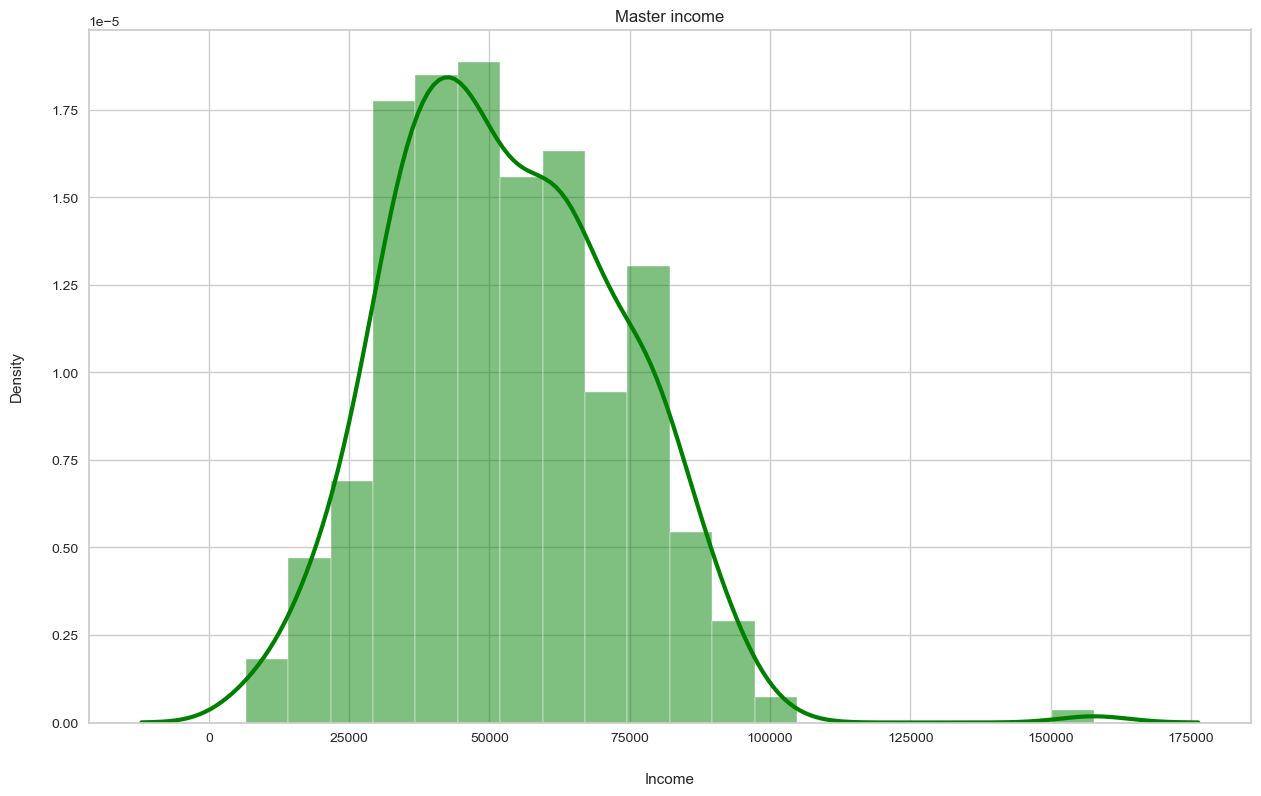

In [118]:
plt.figure(figsize=(15, 9))

histogram = sns.histplot(
    master_data.Income, 
    bins=20, 
    stat='density',
    alpha=0.5,
    color = "green"
)

density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="green")

plt.title("Master income")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

In [119]:
mean_income = master_data.Income.mean()
median_income = master_data.Income.median()
std_income = master_data.Income.std()
print("Media: " + str(mean_income))
print("Mediana: " + str(median_income))
print("Standard deviation: " + str(std_income))

Media: 52917.53424657534
Mediana: 50943.0
Standard deviation: 20157.788029134852


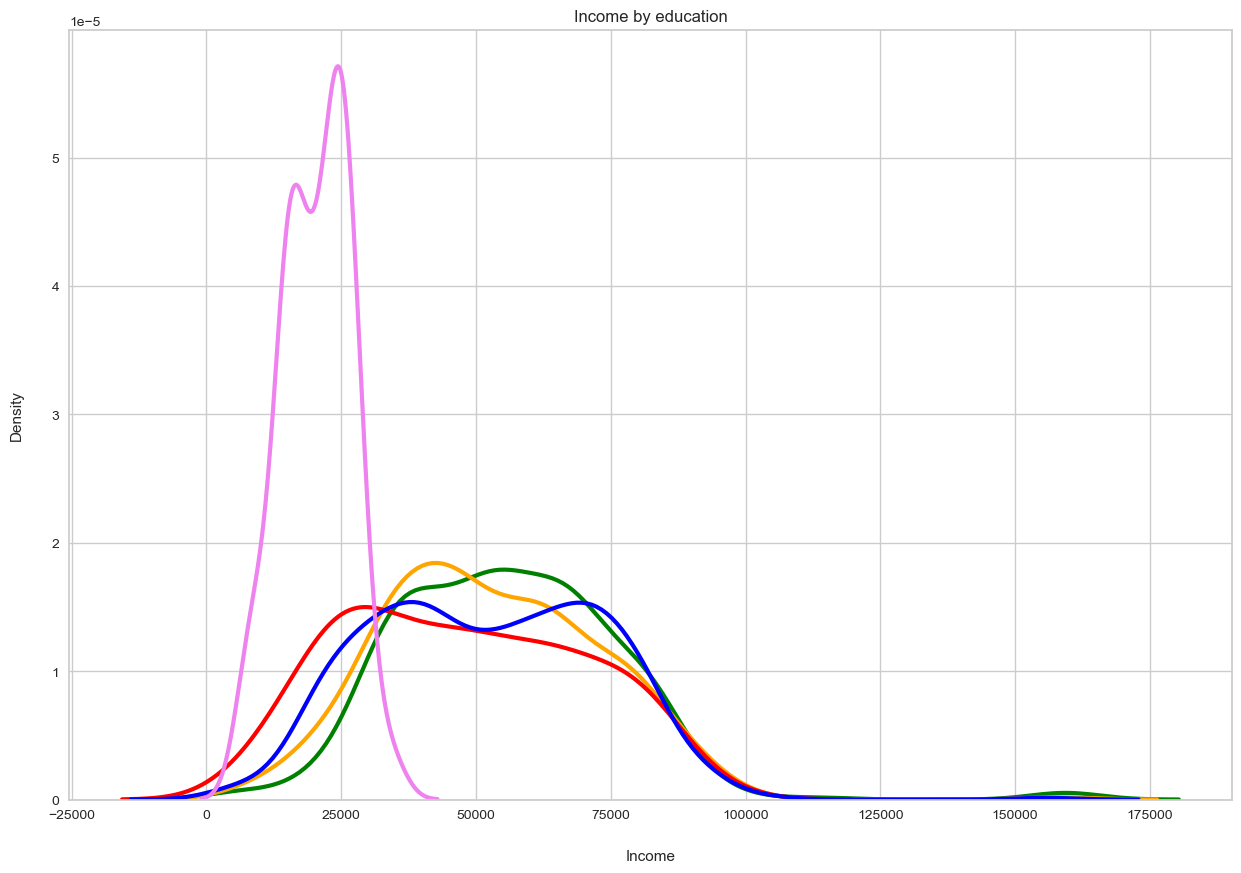

In [120]:
plt.figure(figsize=(15,10))

density_curve = sns.kdeplot(phd_data.Income, linewidth=3, color="green")
density_curve = sns.kdeplot(master_data.Income, linewidth=3, color="orange")
density_curve = sns.kdeplot(cycle_data.Income, linewidth=3, color="red")
density_curve = sns.kdeplot(graduation_data.Income, linewidth=3, color="blue")
density_curve = sns.kdeplot(basic_data.Income, linewidth=3, color="violet")

plt.title("Income by education")
plt.xlabel("Income", labelpad=20)
plt.ylabel("Density", labelpad=20)
plt.show()

#ciao

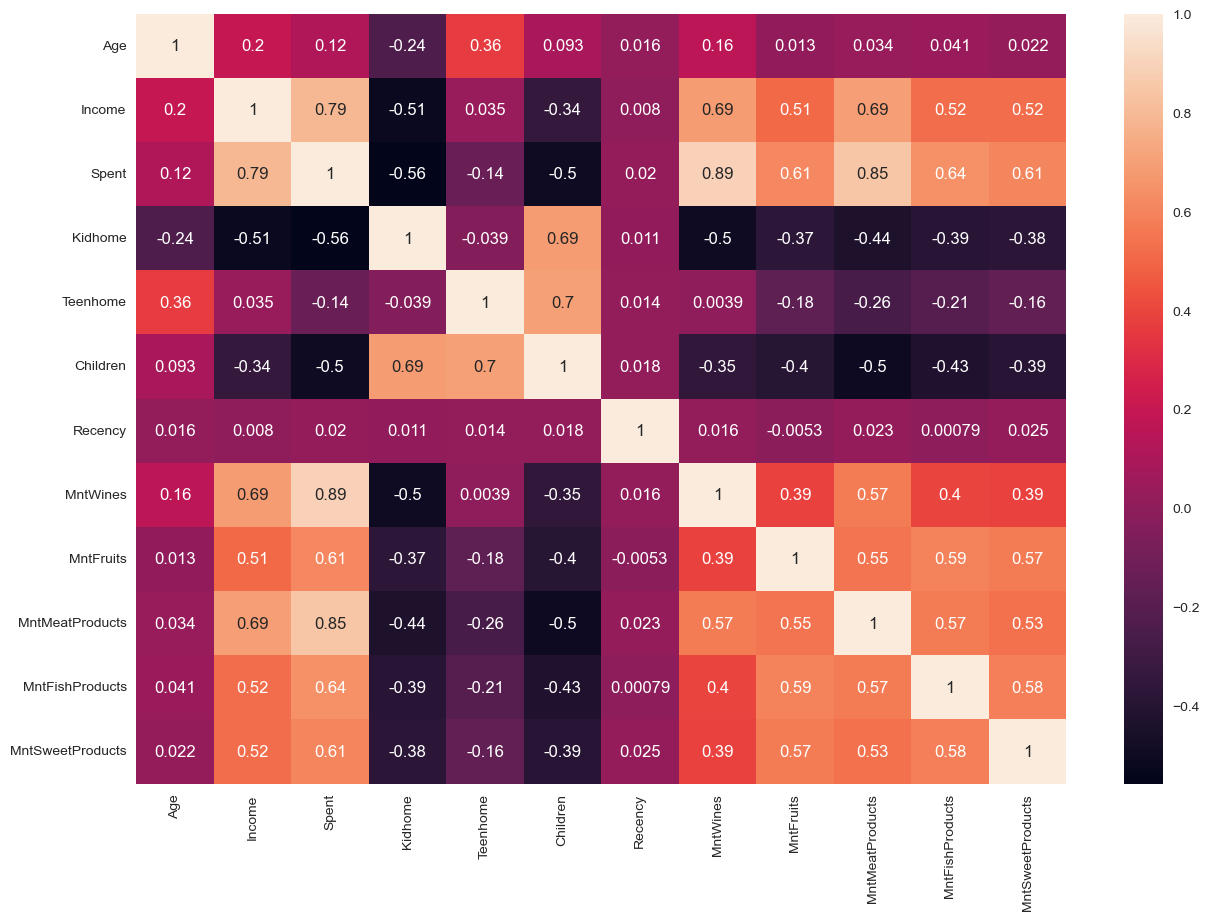

In [121]:
#heatmap per vedere correlazione tra gli attributi
data.drop(["ID","Year_Birth"],axis=1, inplace=True)
data.drop(data.iloc[:, 15:], inplace = True, axis = 1)
data=data.select_dtypes(include=['number'])
plt.figure(figsize=(15,10))
 
ax = sns.heatmap(data.corr(), annot=True)

Reletive Plot Of Some Selected Features: A Data Subset


c:\Users\Marco\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x550 with 0 Axes>

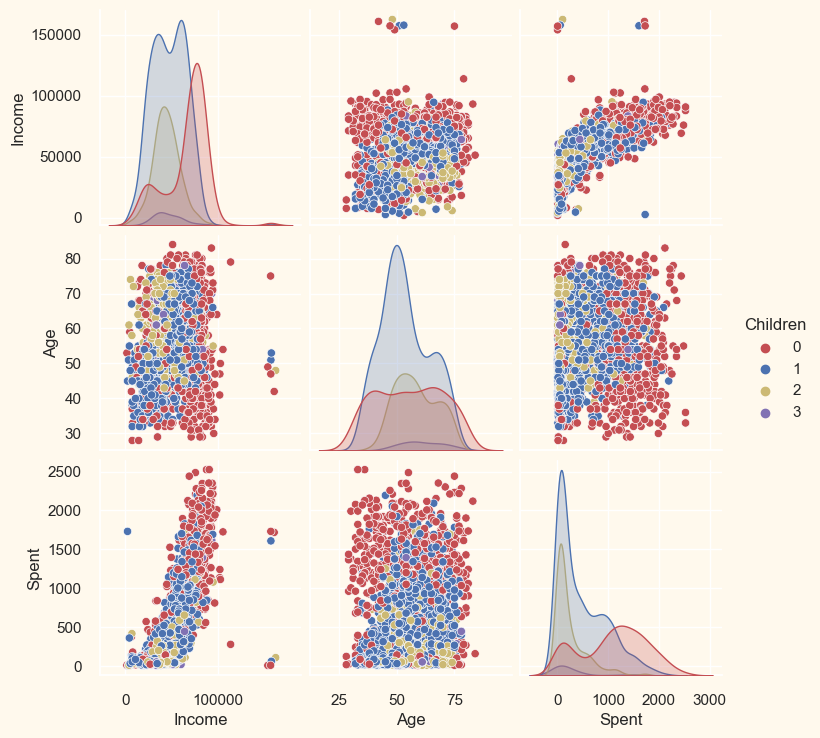

In [122]:
#grafico pairplot per vedere correlazione tra alcuni attributi e il numero dei figli dei clienti
sns.set_theme(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
cmap = colors.ListedColormap(["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"])
To_Plot = [ "Income", "Age", "Spent", "Children"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Children",palette= (["r","b","y","m"])) 
plt.show()

In [129]:
#PCA per ridurre a 3 dimensioni
pca = PCA(n_components=3)
pca.fit(data)
PCA_ds = pd.DataFrame(pca.transform(data), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2212.0,-3.236683e-12,21534.430009,-50229.984054,-16733.195422,-591.116994,16546.028824,110386.837103
col2,2212.0,-1.101919e-13,432.214149,-2430.408525,-228.180720,42.488934,262.302898,3402.065027
col3,2212.0,-8.223279e-16,179.239589,-674.288236,-63.959976,9.335067,55.444397,1587.223795


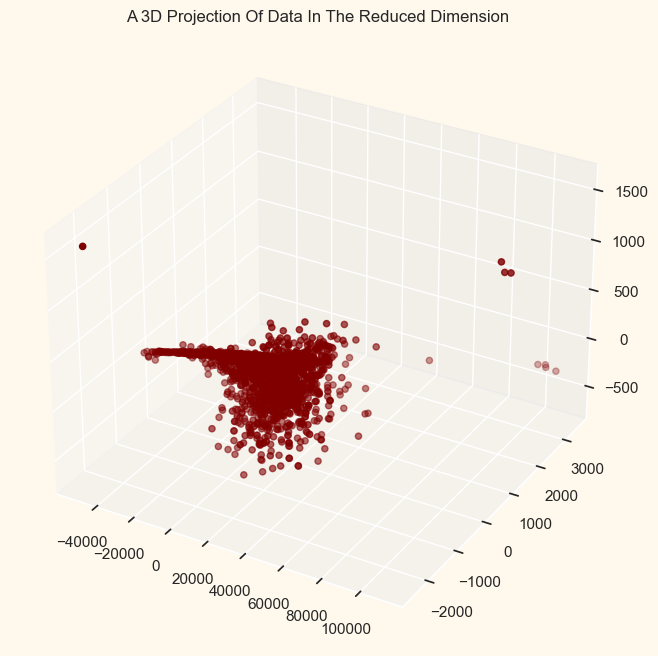

In [130]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Clustering

Elbow Method to determine the number of clusters to be formed:


c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

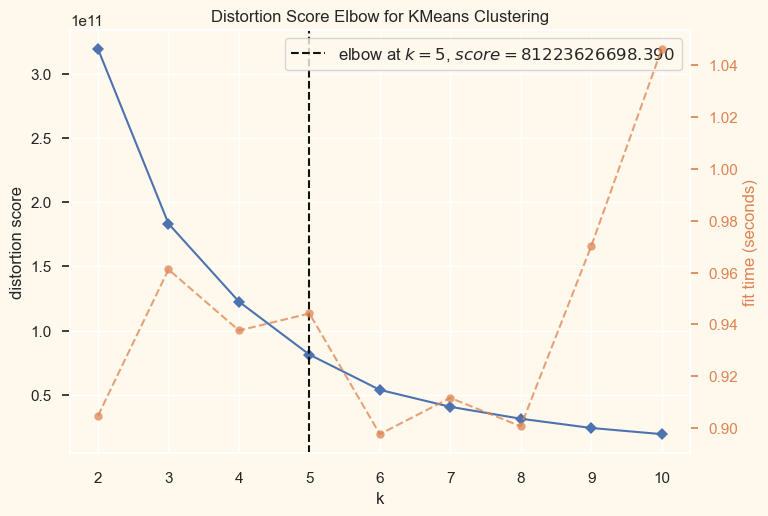

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [132]:
#numero di cluster da utilizzare usando il metodo a gomito con PCA
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

Elbow Method to determine the number of clusters to be formed:


c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Marco\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

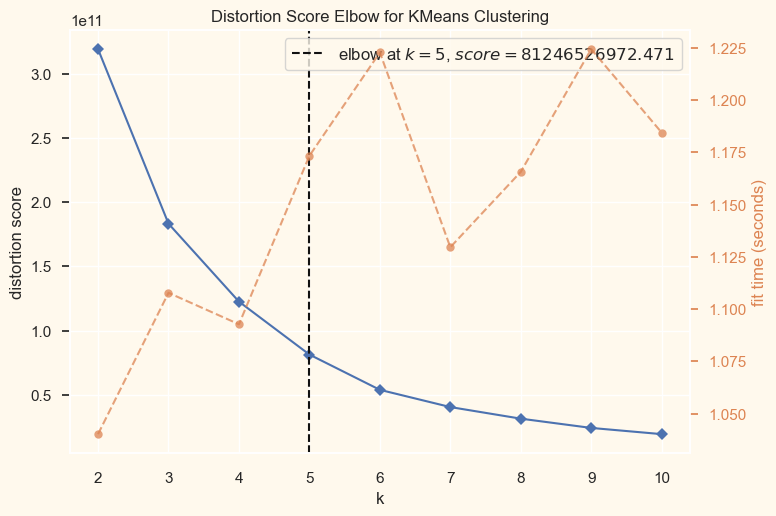

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [133]:
#senza pca
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(data)
Elbow_M.show()